In [1]:
#load python packages
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import chardet
with open('takehome_users.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7294372453287324, 'language': ''}

In [3]:
#load data 
users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
engagement = pd.read_csv('takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
#convert time-stamp column to datetime format
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [8]:
# set index to date-time column
engagement.set_index('time_stamp', inplace=True)
engagement.sort_index()
engagement.head(10)

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
2013-12-31 03:45:04,2,1
2014-01-08 03:45:04,2,1
2014-02-03 03:45:04,2,1
2014-02-08 03:45:04,2,1


In [9]:
# calculate total visits by user 
engagement_total = engagement.groupby(by='user_id')['visited'].sum()

In [10]:
#map total visits from engagement_total to users
users['total_visits'] = users['object_id'].map(engagement_total)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,total_visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0


In [11]:
# determine adopted users - visited at least 3 times within 7 day period 
engagement_grouped = pd.DataFrame(engagement.groupby('user_id').rolling('7D', min_periods=3).visited.sum())
engagement_grouped.head()

visited
user_id time_stamp                  
1       2014-04-22 03:53:30      NaN
2       2013-11-15 03:45:04      NaN
        2013-11-29 03:45:04      NaN
        2013-12-09 03:45:04      NaN
        2013-12-25 03:45:04      NaN

In [12]:
engagement_adopted = engagement_grouped.groupby('user_id').sum()
engagement_adopted.head()

,visited
user_id,
1,0.0
2,6.0
3,0.0
4,0.0
5,0.0


In [13]:
#add indicator column to engagement for adopted users 
engagement_adopted['adopted_user'] = np.where(engagement_adopted.visited > 0, 1, 0)
engagement_adopted.head()

,visited,adopted_user
user_id,,
1,0.0,0
2,6.0,1
3,0.0,0
4,0.0,0
5,0.0,0


In [14]:
engagement_adopted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   visited       8823 non-null   float64
 1   adopted_user  8823 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 206.8 KB


In [15]:
#map adopted_users from engagement_adopted to users
users['adopted'] = users['object_id'].map(engagement_adopted['adopted_user'])
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,total_visits,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0


In [16]:
#check for users who signed up more than once (with same email)
duplicateRowsDF = users[users.duplicated(['email'], keep=False)]
duplicateRowsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 375 to 11905
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   40 non-null     int64  
 1   creation_time               40 non-null     object 
 2   name                        40 non-null     object 
 3   email                       40 non-null     object 
 4   creation_source             40 non-null     object 
 5   last_session_creation_time  32 non-null     float64
 6   opted_in_to_mailing_list    40 non-null     int64  
 7   enabled_for_marketing_drip  40 non-null     int64  
 8   org_id                      40 non-null     int64  
 9   invited_by_user_id          22 non-null     float64
 10  total_visits                32 non-null     float64
 11  adopted                     32 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 4.1+ KB


In [17]:
duplicateRowsDF.sort_values(by='email')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,total_visits,adopted
1603,1604,2014-02-03 04:48:08,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.391662e+09,0,0,0,4128.0,1.0,0.0
3822,3823,2012-11-22 05:51:29,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.353650e+09,0,0,169,9498.0,1.0,0.0
5280,5281,2012-09-29 11:54:08,Bach Amanda,AmandaABach@gmail.com,SIGNUP_GOOGLE_AUTH,1.401883e+09,0,0,146,NaN,344.0,1.0
9040,9041,2013-01-03 00:53:47,Bach Amanda,AmandaABach@gmail.com,ORG_INVITE,NaN,0,0,377,6208.0,NaN,NaN
375,376,2012-08-10 22:27:08,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,1.344638e+09,1,0,104,NaN,1.0,0.0
5081,5082,2013-06-25 19:31:11,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,1.372361e+09,0,0,298,NaN,1.0,0.0
3605,3606,2013-05-10 08:31:59,Sankt Janina,JaninaSankt@gmail.com,GUEST_INVITE,1.369816e+09,0,0,84,8356.0,3.0,0.0
1169,1170,2014-04-27 16:48:34,Sankt Janina,JaninaSankt@gmail.com,ORG_INVITE,1.398617e+09,1,1,285,623.0,1.0,0.0
10153,10154,2014-05-06 10:57:37,Neudorf Kerstin,KerstinNeudorf@gmail.com,ORG_INVITE,1.400238e+09,0,0,359,4563.0,2.0,0.0
11244,11245,2014-01-17 18:05:15,Neudorf Kerstin,KerstinNeudorf@gmail.com,SIGNUP,1.389982e+09,1,1,68,NaN,1.0,0.0


In [18]:
users.nunique()

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
total_visits                    402
adopted                           2
dtype: int64

In [19]:
users.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
           ..
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [20]:
users.invited_by_user_id.fillna(0, inplace=True)

In [21]:
users.adopted.fillna(0, inplace=True)

In [29]:
users.total_visits.fillna(0, inplace=True)

In [30]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
 10  total_visits                12000 non-null  float64
 11  adopted                     12000 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


In [39]:
users.adopted.value_counts()

0.0    10398
1.0     1602
Name: adopted, dtype: int64

In [31]:
#Create dummy or indicator features for categorical variables
users_dummy = pd.get_dummies(data=users[['creation_source']])
users_dummy.head()

,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [32]:
#drop features from dataframe for modeling
users_dropped = users.drop(['object_id', 'creation_time', 'name', 'email', 'creation_source', 'last_session_creation_time', 'adopted'], axis=1)
users_dropped.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,total_visits
0,1,0,11,10803.0,1.0
1,0,0,1,316.0,14.0
2,0,0,94,1525.0,1.0
3,0,0,1,5151.0,1.0
4,0,0,193,5240.0,1.0


In [33]:
users_concat = pd.concat([users_dropped, users_dummy], axis=1)
users_concat.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,total_visits,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,1.0,1,0,0,0,0
1,0,0,1,316.0,14.0,0,1,0,0,0
2,0,0,94,1525.0,1.0,0,1,0,0,0
3,0,0,1,5151.0,1.0,1,0,0,0,0
4,0,0,193,5240.0,1.0,1,0,0,0,0


In [34]:
users_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            12000 non-null  int64  
 1   enabled_for_marketing_drip          12000 non-null  int64  
 2   org_id                              12000 non-null  int64  
 3   invited_by_user_id                  12000 non-null  float64
 4   total_visits                        12000 non-null  float64
 5   creation_source_GUEST_INVITE        12000 non-null  uint8  
 6   creation_source_ORG_INVITE          12000 non-null  uint8  
 7   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 8   creation_source_SIGNUP              12000 non-null  uint8  
 9   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 527.5 KB


In [35]:
from sklearn.model_selection import train_test_split
X = users_concat
y = users['adopted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=629)

## Models

In [36]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.model_selection

Cs = [0.001, 0.1, 1, 10, 100]
logistic = LogisticRegression()
hyperparameters = dict(C=Cs)
clf = sklearn.model_selection.GridSearchCV(logistic, hyperparameters, cv=5)
best_model = clf.fit(X_test, y_test)
Best_C = best_model.best_estimator_.get_params()['C']
print('Best C:', Best_C)

/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

Best C: 100


/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

In [37]:
clf = LogisticRegression(C=Best_C)
clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test))

0.9852777777777778


/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


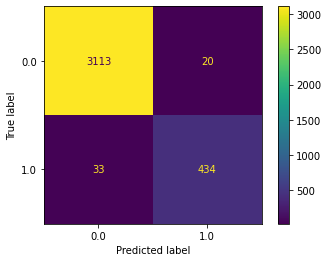

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, values_format = '.5g')  
plt.show() 

Model Entropy - no max depth
Accuracy: 0.9797222222222223
Balanced accuracy: 0.9555512192854814


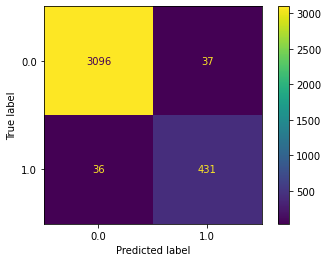

In [43]:
from sklearn import tree, metrics
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
plot_confusion_matrix(entr_model, X_test, y_test, values_format = '.5g')  
plt.show()

Accuracy: 0.9844444444444445
Balanced accuracy: 0.9655528527910733


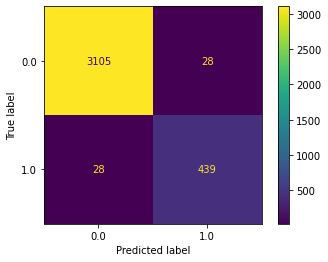

In [52]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy",  max_depth=5, random_state = 1234)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Entropy - max depth - 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
plot_confusion_matrix(entr_model, X_test, y_test, values_format = '.5g')  
plt.show()

Model Entropy - max depth - 8
Accuracy: 0.9841666666666666
Balanced accuracy: 0.9617489718825161


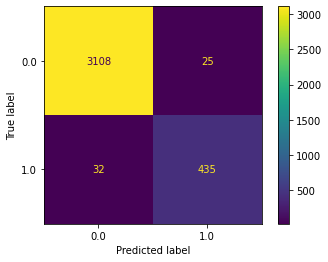

In [53]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy",  max_depth=8, random_state = 1234)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Entropy - max depth - 8")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
plot_confusion_matrix(entr_model, X_test, y_test, values_format = '.5g')  
plt.show()

Model Gini Impurity - no max depth
Accuracy: 0.9813888888888889
Balanced accuracy: 0.9619752021548604


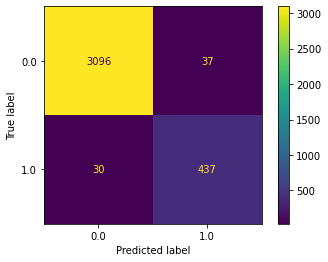

In [47]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Gini Impurity - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(gini_model, X_test, y_test, values_format = '.5g')  
plt.show()  

Model Gini - max depth - 5
Accuracy: 0.9838888888888889
Balanced accuracy: 0.9561229462426296


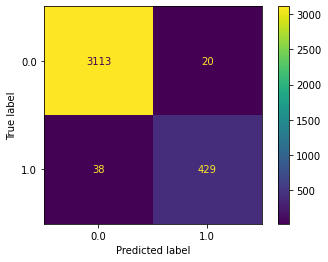

In [54]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", max_depth=5, random_state = 1234)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Gini - max depth - 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(gini_model, X_test, y_test, values_format = '.5g')  
plt.show()  

Model Gini - max depth - 8
Accuracy: 0.9827777777777778
Balanced accuracy: 0.9554845804590356


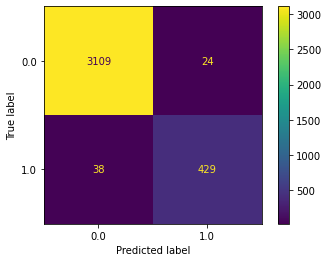

In [55]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", max_depth=8, random_state = 1234)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Gini - max depth - 8")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(gini_model, X_test, y_test, values_format = '.5g')  
plt.show()  

Random Forest Model - no max depth
Accuracy: 0.9838888888888889
Balanced accuracy: 0.9634115251679469


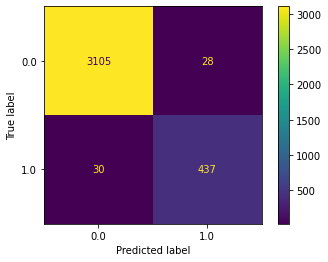

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RFModel = RandomForestClassifier(random_state = 1234)
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)

print("Random Forest Model - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(RFModel, X_test, y_test, values_format = '.5g')  
plt.show() 

Random Forest Model - max depth - 5
Accuracy: 0.9836111111111111
Balanced accuracy: 0.9577854995280604


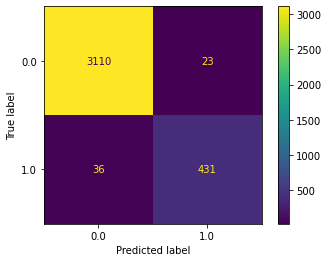

In [56]:
RFModel = RandomForestClassifier(random_state = 1234, max_depth=5)
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)

print("Random Forest Model - max depth - 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(RFModel, X_test, y_test, values_format = '.5g')  
plt.show() 

Random Forest Model - max depth - 9
Accuracy: 0.9847222222222223
Balanced accuracy: 0.9620681547743131


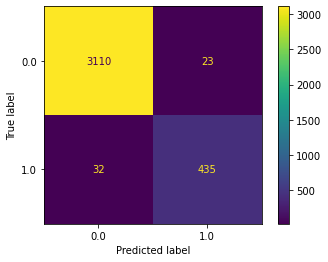

In [59]:
RFModel = RandomForestClassifier(random_state = 1234, max_depth=10)
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)

print("Random Forest Model - max depth - 9")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(RFModel, X_test, y_test, values_format = '.5g')  
plt.show() 